In [49]:
library(tidyverse)
library(repr)



players <- read_csv("players.csv")

sessions <- read_csv("sessions.csv")

joined<- inner_join(sessions,players) |> head()
joined 



Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(hashedEmail)`


hashedEmail,start_time,end_time,original_start_time,original_end_time,experience,subscribe,played_hours,name,gender,Age
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12,Regular,TRUE,223.1,Hiroshi,Male,17
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12,Amateur,TRUE,53.9,Alex,Male,17
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12,Amateur,TRUE,150.0,Delara,Female,16
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12,Regular,TRUE,223.1,Hiroshi,Male,17
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12,Amateur,TRUE,53.9,Alex,Male,17
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12,Regular,TRUE,223.1,Hiroshi,Male,17


Data Description:

Above, we see the data loaded into R using read_csv. The two data files are then merged into one to allow us to conveniently review the data. However, we will only be using the 'players' data set for the specific question. Here are what the variables mean:

| Variable            | Description                                                                                                                                                        |
| ------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| hashedEmail         | These strings of characters are encrypted email addresses that undergo "hashing" to make them secure                                                               |
| start_time          | The time and date a user logs in to the Minecraft server                                                                                                           |
| end_time            | The time and date a user logs out of the Minecraft server                                                                                                          |
| original_start_time | The same information as `start_time`, but in an easily readable format for computers: Unix Timestamp, which tracks the number of seconds passed since Jan 1st 1970 |
| original_end_time   | The same information as `end_time`, but in an easily readable format for computers: Unix Timestamp, which tracks the number of seconds passed since Jan 1st 1970   |
| experience          | Classifies the user based on how much experience they have playing the game as "veteran," "regular," or "amateur"                                                  |
| subscribe           | Logical variable that states whether or not the user has subscribed to the game-related newsletter                                                                 |
| played_hours        | Total amount of hours that the user has logged on the server                                                                                                       |
| name                | User name                                                                                                                                                          |
| gender              | User gender                                                                                                                                                        |
| age                 | User age                                                                                                                                                           |



In [43]:
sessions |> summary(across(round(hashed_Email : original_end_time)), 3)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.71e+12   
 Class :character   Class :character   Class :character   1st Qu.:1.72e+12   
 Mode  :character   Mode  :character   Mode  :character   Median :1.72e+12   
                                                          Mean   :1.72e+12   
                                                          3rd Qu.:1.72e+12   
                                                          Max.   :1.73e+12   
                                                                             
 original_end_time 
 Min.   :1.71e+12  
 1st Qu.:1.72e+12  
 Median :1.72e+12  
 Mean   :1.72e+12  
 3rd Qu.:1.72e+12  
 Max.   :1.73e+12  
 NA's   :2         

In [44]:
players |> summary(across(round(hashed_Email: Age), 3))


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Above, this summary shows us how many items are in each column, as well as the minimum, maximum, and mean of numeric values. 

Below, we take this data (from the"players" file) and create a table reporting the mean age on the server and the mean hours played

In [26]:

players_means <- players |>
  summarise(across(where(is.numeric), mean, na.rm = TRUE))

table<- tibble(players_means)
table


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


We can create a visualization to analyze if there is a relationship between age and the amount of time played on the server. A common perception is that teens spend way more time on video games than other age groups. We can use this data to investigate if that's true in this case!


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


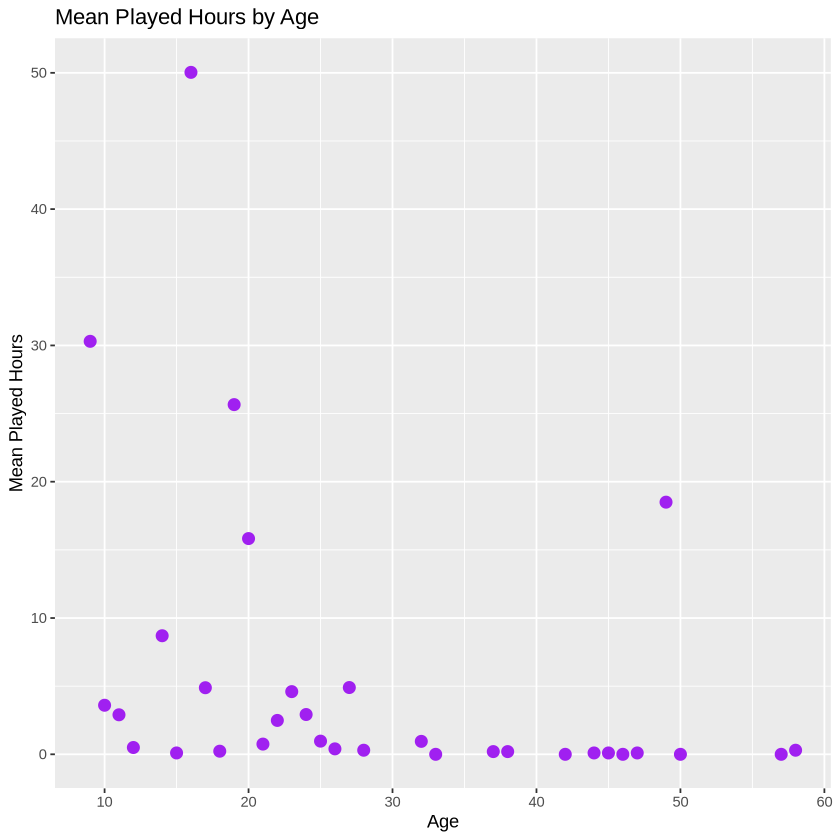

In [27]:

age_means  <- players |>
  group_by(Age) |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE))


ggplot(age_means, na.rm = TRUE, aes(x = Age, y = mean_played_hours)) +
  geom_point(color = "purple", size = 3) +
  labs(
    title = "Mean Played Hours by Age",
    x = "Age",
    y = "Mean Played Hours")

The above graph shows there is no clear relationship between age and the mean amount of hours played on the server. 

Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

My Question: Can the number of hours played predict whether an individual will subscribe to the newsletter or not, using the "players" data set?

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


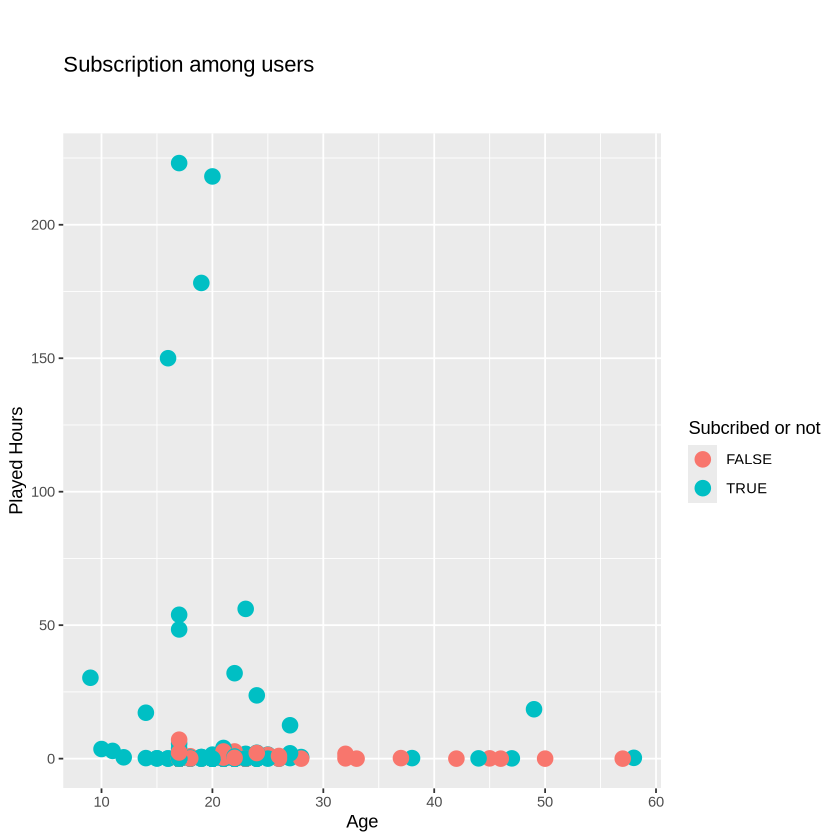

In [41]:
ggplot(players, na.rm = TRUE, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point( size = 4) +
  labs(
    title = "

Subscription among users 
      
",
    x = "Age",
    y = "Played Hours", color = "Subcribed or not")

The data visualization above allows us to see that no one who played more than ~15 hours on the server subscribed to the newsletter, indicating a possible relationship. To create a model, we must see that the data is not continuous, as our response variable is a logical True or False, and not something that can be modelled linearly. Because of this, we would not want to use linear regression as the data does not present itself in a linear fashion, and does not have a continuous outcome. Similarly, we would not want to use KNN Regression because the outcome is not a continuous numerical value. 

For this kind of data, we would want to create a model using KNN Classification, which does not require continuous data, and can operate with classification outcomes like True or False in this case. With the right tuning and the use of cross-validation, we can use KNN classification to find the optimal amount of K neighbours, to be able to predict whether or not a player is likely to be subscribed to the newsletter based on how much of hours they have logged on the server. 

To accomplish this, we will only be using the "players" data set, then we will split the data into training and testing splits with a 65:35 training: testing ratio using prop and strata. We will then create a recipe using played_hours as our predictor with our training data, ensuring our data is scaled because KNN classification uses distance. We will then perform a five-fold cross-validation, followed by a workflow analysis using K values ranging from 1-20. We will then use the metrics function to find the best k for this model. This ideal k value will be used to fit our model so that we can predict unknown data points. 

A limitation to this model would be that the cross-validation of 20 Ks is extremely intensive and may need to be altered to be less straining on the server. Furthermore, KNN Classification does not fit an exact model like linear regression (which has distinct coefficients), so it may be hard to see what variable is truly the most predictive of an outcome. 